In [1]:
# Install if needed
!pip install pandas matplotlib seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# === Google Colab setup (only works in Colab) ===
# from google.colab import drive
# drive.mount('/content/drive')


### Data Loading Setup

This notebook is designed to run in **two environments**:

- **Google Colab**: Uses Google Drive mount (`from google.colab import drive`) and absolute paths to access the CSV files stored in Drive.  
- **Local VS Code/Jupyter**: Uses relative paths (`../data/...`) to access the CSV files stored in the `data/` folder of this repository.

If running in Colab, uncomment the Colab setup section and comment out the local one.  
If running locally, keep the local setup active and leave the Colab section commented.  

This dual setup ensures the notebook is **portable and reproducible** across cloud and local environments.


In [8]:

if not all(os.path.exists(p) for p in (header_path, line_path, code_path)):
    print('Contents of ../data:', sorted(os.listdir(os.path.join('..','data')) if os.path.exists(os.path.join('..','data')) else []))

# Load data with a forgiving encoding and warn on bad lines
df_header = pd.read_csv(header_path, encoding='utf-8-sig', on_bad_lines='warn')
df_line = pd.read_csv(line_path, encoding='utf-8-sig', on_bad_lines='warn')
df_code = pd.read_csv(code_path, encoding='utf-8-sig', on_bad_lines='warn')

# Confirm shapes
print("HEADER:", df_header.shape)
print("LINE:", df_line.shape)
print("CODE:", df_code.shape)
# Local VS Code setup: point paths to the `data/` folder in the repo
import os
import pandas as pd
header_path = os.path.join('..','data','STONYBRK_20240531_HEADER.csv')
line_path   = os.path.join('..','data','STONYBRK_20240531_LINE.csv')
code_path   = os.path.join('..','data','STONYBRK_20240531_CODE.csv')

# If you originally used Colab, the Colab paths are commented out below (don’t use them locally):
# header_path = '/content/drive/My Drive/Colab Notebooks/claims-data/STONYBRK_20240531_HEADER.csv'
# line_path   = '/content/drive/My Drive/Colab Notebooks/claims-data/STONYBRK_20240531_LINE.csv'
# code_path   = '/content/drive/My Drive/Colab Notebooks/claims-data/STONYBRK_20240531_CODE.csv'

# Quick existence check and helpful listing if files are missing
for p in (header_path, line_path, code_path):
    if not os.path.exists(p):
        print(f'WARNING: file not found: {p}')


HEADER: (388, 43)
LINE: (520, 28)
CODE: (1536, 9)


In [9]:
# Diagnostic: try multiple encodings and separators to detect common CSV issues
import pandas as pd, os
paths = {"HEADER": header_path, "LINE": line_path, "CODE": code_path}
encodings = ['utf-8','utf-8-sig','latin1','cp1252']
seps = [',',';','	','|']
for name,p in paths.items():
    print('---', name, p)
    if not os.path.exists(p):
        print(' MISSING')
        continue
    tried = False
    for enc in encodings:
        for sep in seps:
            try:
                df = pd.read_csv(p, encoding=enc, sep=sep, nrows=5, on_bad_lines='warn')
                print(f' OK encoding={enc!r} sep={sep!r} shape={df.shape}')
                print(df.head(1).to_dict(orient='records'))
                tried = True
                raise SystemExit
            except SystemExit:
                break
            except Exception as e:
                pass
    if not tried:
        print(' No working encoding/separator detected (try opening file in a text editor)')


--- HEADER ..\data\STONYBRK_20240531_HEADER.csv
 OK encoding='utf-8' sep=',' shape=(5, 43)
[{'ClientId': 49, 'ProspectiveClaimId': 35216986, 'ClaimType': 'P', 'BillingProviderNPI': 1154376309, 'BillingProvFirstName': 'NEW YORK SPINE AND BRAIN SURGERY', 'BillingProvLastName': nan, 'AttendingProviderNPI': nan, 'AttendingProvFirstName': nan, 'AttendingProvLastName': nan, 'RenderingProviderNPI': 1902082209, 'RenderingProvFirstName': 'YUEHJIEN', 'RenderingProvLastName': 'GU ', 'ReferringProviderNPI': 1467416271.0, 'ReferringProvFirstName': 'DAVID', 'ReferringProvLastName': 'FIORELLA -PHD', 'OperatingProviderNPI': nan, 'OperatingProvFirstName': nan, 'OperatingProvLastName': nan, 'ServiceFromDate': '9/25/23 0:00', 'ServiceToDate': '9/25/23 0:00', 'PrimaryPayerName': 'AETNA', 'PrimaryPayerCode': 147, 'PrimaryPayerCFI': 'AE', 'SecondaryPayer': nan, 'SecondaryPayerCode': nan, 'SecondaryPayerCFI': nan, 'TertianaryPayer': nan, 'TertianaryPayerCode': nan, 'TertianaryPayerCFI': nan, 'DRG': nan, 'Adm

In [10]:

import pandas as pd

df_header = pd.read_csv(header_path)
df_line = pd.read_csv(line_path)
df_code = pd.read_csv(code_path)
df_header.head()
df_line.head()
df_code.head()


,ClientId,ProspectiveClaimId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,36752505,ABF,3,G93.6,NaN,NaN,NaN,NaN
1,49,36819490,ABF,4,N17.9,NaN,NaN,NaN,NaN
2,49,35352862,ABF,2,G06.1,NaN,NaN,NaN,NaN
3,49,35244774,ABF,10,G90.8,NaN,NaN,NaN,NaN
4,49,36745815,ABK,1,I77.819,NaN,NaN,NaN,NaN


In [13]:
# === Interactive DataFrame Viewer ===

import sys

# If running in Google Colab, use InteractiveSheet (commented out for local use)
if 'google.colab' in sys.modules:
    from google.colab import sheets
    sheet = sheets.InteractiveSheet(df=df_code)
else:
    # Use qgrid for interactive viewing in VS Code or Jupyter
    try:
        import qgrid
        qgrid_widget = qgrid.show_grid(df_code, show_toolbar=True)
        qgrid_widget
    except ImportError:
        print("qgrid is not installed. Run `pip install qgrid` to enable interactive viewing.")


qgrid is not installed. Run `pip install qgrid` to enable interactive viewing.


In [14]:

# HEADER

print(df_header.shape)
print(df_header.head())
print(df_header.info())
print(df_header.isnull().sum())
print(df_header.describe())


(388, 43)
   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2                   Na

In [15]:

df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'])
df_header['ServiceToDate'] = pd.to_datetime(df_header['ServiceToDate'])



C:\Users\naira\AppData\Local\Temp\ipykernel_34084\3318925206.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'])
C:\Users\naira\AppData\Local\Temp\ipykernel_34084\3318925206.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header['ServiceToDate'] = pd.to_datetime(df_header['ServiceToDate'])


In [16]:

# Explore LINE file
print("LINE shape:", df_line.shape)
print(df_line.head())        # First 5 rows
print(df_line.info())        # Column names and data types
print(df_line.isnull().sum())# Missing values per column
print(df_line.describe())    # Basic stats for numeric columns


LINE shape: (520, 28)
   ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   
1        49            35235657        1      NaN  99291        GC        25   
2        49            35244774        1      NaN  99291        GC        25   
3        49            35249003        1      NaN  99291        GC       NaN   
4        49            35249014        1      NaN  99291        GC       NaN   

   Modifier3  Modifier4            DxMapDelim  ...  PlaceOfService  NDC  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
1        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
2        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
3        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   
4        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   

   NDCUnits  NDCRx NDCUnitQualifier RenderingP

In [17]:

# Explore CODE file
print("CODE shape:", df_code.shape)
print(df_code.head())        # First 5 rows
print(df_code.info())        # Column names and data types
print(df_code.isnull().sum())# Missing values per column
print(df_code.describe())    # Basic stats for numeric columns


CODE shape: (1536, 9)
   ClientId  ProspectiveClaimId CodeQualifier  CodePos CodeValue  \
0        49            36752505           ABF        3     G93.6   
1        49            36819490           ABF        4     N17.9   
2        49            35352862           ABF        2     G06.1   
3        49            35244774           ABF       10     G90.8   
4        49            36745815           ABK        1   I77.819   

   CodeFromDate  CodeToDate  CodeAmnt  POAInd  
0           NaN         NaN       NaN     NaN  
1           NaN         NaN       NaN     NaN  
2           NaN         NaN       NaN     NaN  
3           NaN         NaN       NaN     NaN  
4           NaN         NaN       NaN     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ClientId            1536 non-null   int64  
 1   ProspectiveClaimId  153

In [18]:

unique_claims = df_header['ProspectiveClaimId'].nunique()
print("Unique claims:", unique_claims)


Unique claims: 388


In [19]:

avg_lines = df_line.groupby('ProspectiveClaimId').size().mean()
print("Avg service lines per claim:", avg_lines)

avg_dx = df_code.groupby('ProspectiveClaimId').size().mean()
print("Avg diagnosis codes per claim:", avg_dx)



Avg service lines per claim: 1.3402061855670102
Avg diagnosis codes per claim: 3.9587628865979383


In [20]:
print("Date range:", df_header['ServiceFromDate'].min(), "to", df_header['ServiceToDate'].max())

Date range: 2023-09-25 00:00:00 to 2024-05-29 00:00:00



# Part 1: Data Loading & Exploration

## Header File Exploration
- Contains high-level claim information such as provider NPIs, service dates, and payer details.
- Observed columns: ProspectiveClaimId, ServiceFromDate, ServiceToDate, PrimaryPayerName, PlaceOfService, etc.
- Missing values: Minimal (mostly zero for some columns like WorkQueName).
- Total rows: 388 claims.

## LINE File Exploration
- Contains service line details including HCPCS codes, modifiers, charges, and units.
- Observed columns: ProspectiveClaimId, HCPCS, Charges, Units, DxMapDelim.
- Missing values: Few or none in critical columns.
- Average service lines per claim: **1.34**

## CODE File Exploration
- Contains diagnosis codes (ICD-10) linked to claims.
- Observed columns: ProspectiveClaimId, CodeValue, CodeQualifier.
- Missing values: None in key columns.
- Average diagnosis codes per claim: **3.96**

## Key Metrics
- **Unique claims:** 388
- **Date range:** 2023-09-25 to 2024-05-29
- **Avg service lines per claim:** 1.34
- **Avg diagnosis codes per claim:** 3.96




## PART 2
### Q1: Top 5 Billing Providers
- The top 5 billing providers were identified based on claim volume.
- Visualization shows provider NPIs and their respective claim counts.


BillingProviderNPI
1821035601    152
1063468536     81
1154376309     69
1538114723     40
1437105905     36
Name: count, dtype: int64


C:\Users\naira\AppData\Local\Temp\ipykernel_34084\566567782.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_providers.index, y=top_providers.values, palette="Blues_d")


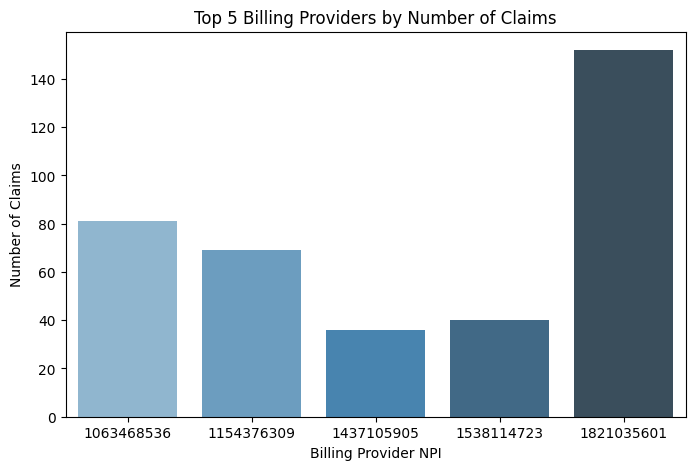

In [21]:

# Top 5 billing providers by number of claims
top_providers = df_header['BillingProviderNPI'].value_counts().head(5)
print(top_providers)

# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=top_providers.index, y=top_providers.values, palette="Blues_d")
plt.title("Top 5 Billing Providers by Number of Claims")
plt.xlabel("Billing Provider NPI")
plt.ylabel("Number of Claims")
plt.show()



### Q2: Payer Mix Analysis
- The top 5 payers account for the majority of claims.
- Pie chart shows their percentage distribution.


PrimaryPayerName
MEDICARE                      242
HEALTHFIRST FFS                46
FIDELIS/BETTER HEALTH PLAN     26
HIP MEDICAID                   17
HEALTHFIRST CAPITATED          10
Name: count, dtype: int64
PrimaryPayerName
MEDICARE                      62.371134
HEALTHFIRST FFS               11.855670
FIDELIS/BETTER HEALTH PLAN     6.701031
HIP MEDICAID                   4.381443
HEALTHFIRST CAPITATED          2.577320
Name: count, dtype: float64


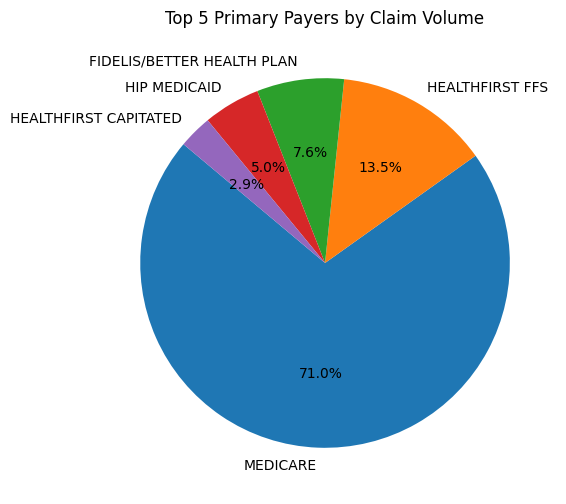

In [22]:

# Top 5 primary payers
payer_counts = df_header['PrimaryPayerName'].value_counts().head(5)
payer_percent = (payer_counts / len(df_header)) * 100
print(payer_counts)
print(payer_percent)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(payer_counts, labels=payer_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Primary Payers by Claim Volume")
plt.show()



### Q3: Common Diagnoses
- The most frequent ICD-10 codes were identified.
- These represent common conditions in the dataset.


CodeValue
J96.01    62
I10       49
E78.5     49
G93.5     34
D64.9     29
I25.10    27
I61.9     26
I48.91    24
I60.8     24
I50.9     22
Name: count, dtype: int64


C:\Users\naira\AppData\Local\Temp\ipykernel_34084\3881543236.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dx.index, y=top_dx.values, palette="Greens_d")


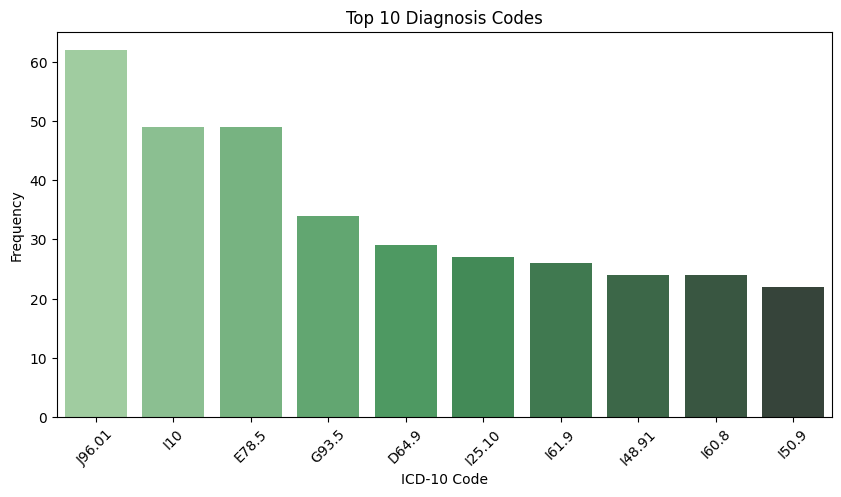

In [23]:

top_dx = df_code['CodeValue'].value_counts().head(10)
print(top_dx)

# Bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=top_dx.index, y=top_dx.values, palette="Greens_d")
plt.title("Top 10 Diagnosis Codes")
plt.xlabel("ICD-10 Code")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()



### Q4: Common Procedures
- The most frequent HCPCS codes were identified.
- Visualization shows top 10 procedures billed.


HCPCS
99291    68
99233    48
99213    39
99223    33
99222    32
99232    21
90833    16
99204    14
99214    14
92557    14
Name: count, dtype: int64


C:\Users\naira\AppData\Local\Temp\ipykernel_34084\3584919072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_proc.index, y=top_proc.values, palette="Purples_d")


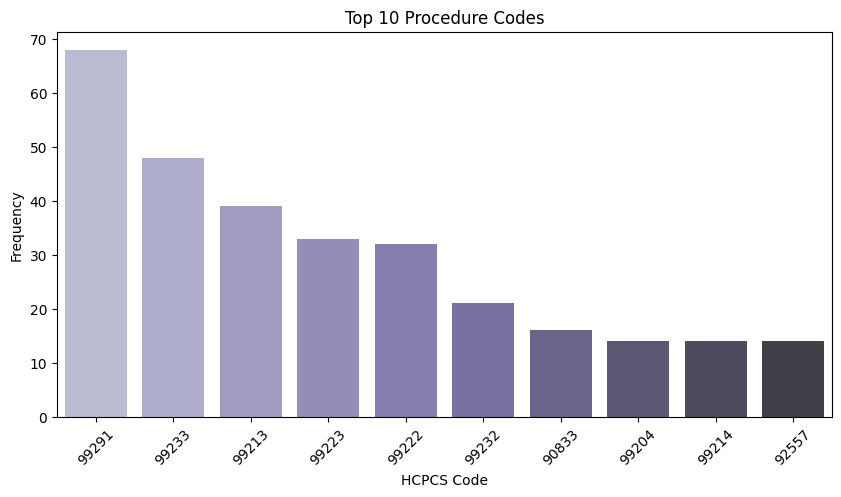

In [24]:

top_proc = df_line['HCPCS'].value_counts().head(10)
print(top_proc)

# Bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=top_proc.index, y=top_proc.values, palette="Purples_d")
plt.title("Top 10 Procedure Codes")
plt.xlabel("HCPCS Code")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()



### Q5: Place of Service Analysis
- Most claims were submitted for [insert top location].
- Chart shows distribution across service locations.


PlaceOfService
21    231
11    132
22     24
23      1
Name: count, dtype: int64
PlaceOfService
21    59.536082
11    34.020619
22     6.185567
23     0.257732
Name: count, dtype: float64


C:\Users\naira\AppData\Local\Temp\ipykernel_34084\277085230.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_counts.index, y=pos_counts.values, palette="Oranges_d")


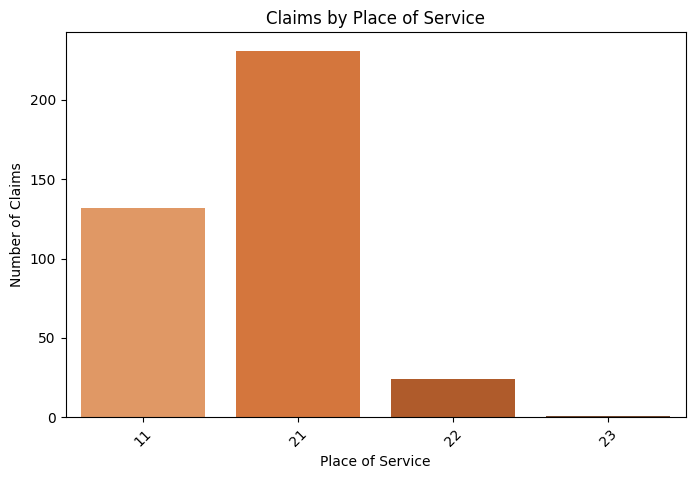

In [25]:

pos_counts = df_header['PlaceOfService'].value_counts()
pos_percent = (pos_counts / len(df_header)) * 100
print(pos_counts)
print(pos_percent)

# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=pos_counts.index, y=pos_counts.values, palette="Oranges_d")
plt.title("Claims by Place of Service")
plt.xlabel("Place of Service")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45)
plt.show()


## PART 3

### Q6: Claims with High Service Line Counts
- Merged HEADER and LINE files to calculate service line counts and total charges.
- Identified claims with 5 or more service lines.
- These claims may represent complex cases or bundled services.


In [26]:

# Merge HEADER and LINE files
merged_hl = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')

# Calculate number of service lines and total charges per claim
line_summary = merged_hl.groupby('ProspectiveClaimId').agg(
    num_lines=('LinePos', 'count'),
    total_charges=('Charges', 'sum'),
    billing_provider=('BillingProviderNPI', 'first')
).reset_index()

# Filter claims with 5 or more service lines
high_line_claims = line_summary[line_summary['num_lines'] >= 5]
print(high_line_claims.head())


     ProspectiveClaimId  num_lines  total_charges  billing_provider
79             36668119          6           1030        1538114723
109            36710175          5            873        1538114723
125            36740402          6            945        1538114723
135            36757684          5            873        1538114723
151            36794825          7           1163        1083660575



### Q7: Diagnosis-Procedure Combinations
- Linked claims to both procedures and diagnoses.
- For CPT code 99291 (critical care), the most common associated diagnoses were identified.


In [27]:

# Merge all three files
merged_all = df_line.merge(df_code, on='ProspectiveClaimId').merge(df_header, on='ProspectiveClaimId')

# Filter for CPT code 99291
cpt_99291_dx = merged_all[merged_all['HCPCS'] == '99291']['CodeValue'].value_counts().head(10)
print(cpt_99291_dx)


CodeValue
J96.01     53
G93.5      34
E78.5      33
I61.9      26
D64.9      25
I10        24
I60.8      24
I95.9      20
D72.829    19
I67.848    17
Name: count, dtype: int64



### Q8: Charges by Payer
- Calculated total and average charges per claim for each payer.
- Top 10 payers by total charges are shown in the bar chart.


                      PrimaryPayerName  total_charges  num_claims   avg_charge
17                            MEDICARE         131008         242   541.355372
12                     HEALTHFIRST FFS          29794          46   647.695652
9           FIDELIS/BETTER HEALTH PLAN          10810          26   415.769231
14                        HIP MEDICAID          10014          17   589.058824
0                                AETNA           6930           6  1155.000000
4                      DIRECT SELF PAY           6575           6  1095.833333
21  UNITED COMMUNITY PLAN GOVT PROGRAM           5175           5  1035.000000
10               HEALTHFIRST CAPITATED           4905          10   490.500000
7                       EMPIRE BLUE SR           4620           4  1155.000000
15                           MAGNACARE           3465           3  1155.000000


C:\Users\naira\AppData\Local\Temp\ipykernel_34084\288484411.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PrimaryPayerName', y='total_charges', data=charges_by_payer, palette="Blues_d")


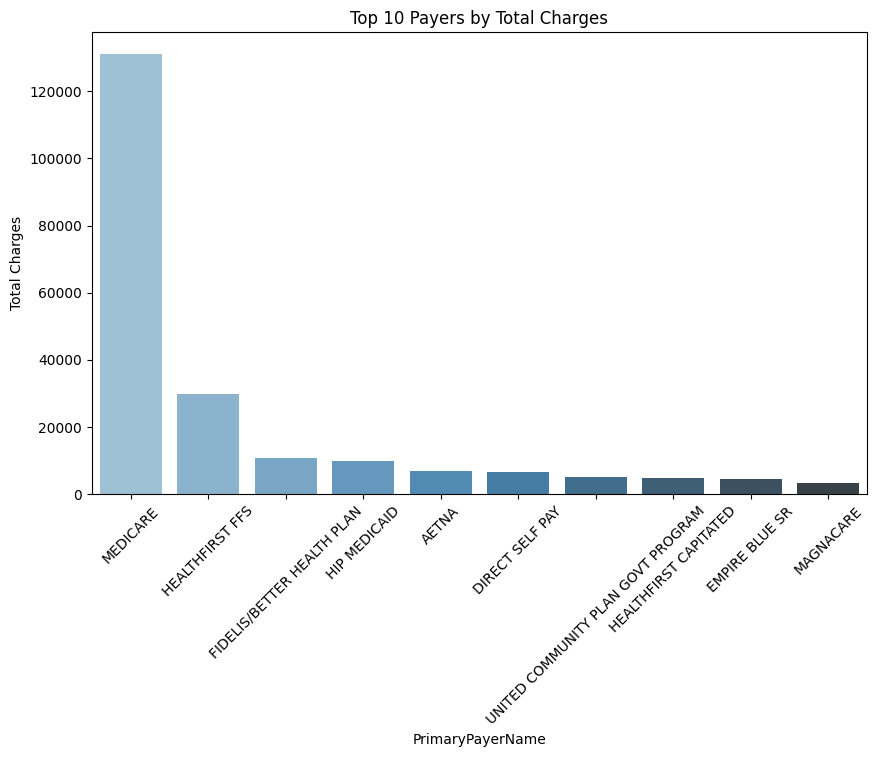

In [28]:

# Merge HEADER and LINE files
merged_hl = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')

# Group by PrimaryPayerName
charges_by_payer = merged_hl.groupby('PrimaryPayerName').agg(
    total_charges=('Charges', 'sum'),
    num_claims=('ProspectiveClaimId', 'nunique')
).reset_index()

# Calculate average charges per claim
charges_by_payer['avg_charge'] = charges_by_payer['total_charges'] / charges_by_payer['num_claims']

# Sort by total charges
charges_by_payer = charges_by_payer.sort_values(by='total_charges', ascending=False).head(10)
print(charges_by_payer)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='PrimaryPayerName', y='total_charges', data=charges_by_payer, palette="Blues_d")
plt.title("Top 10 Payers by Total Charges")
plt.xticks(rotation=45)
plt.ylabel("Total Charges")
plt.show()



# Merge HEADER and CODE files

## Part 4: Creative Analysis
### Question: Which providers bill for the most complex cases (highest number of diagnosis codes per claim)?
- Merged HEADER and CODE files to link providers with diagnosis codes.
- Calculated average number of diagnosis codes per claim for each provider.
- Top 10 providers with the highest complexity are shown in the bar chart.
- Insight: Providers with higher average diagnosis codes may handle more complex cases or multi-condition patients.


C:\Users\naira\AppData\Local\Temp\ipykernel_34084\3080090293.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='billing_provider', y='avg_dx_per_claim', data=provider_complexity, palette="coolwarm")


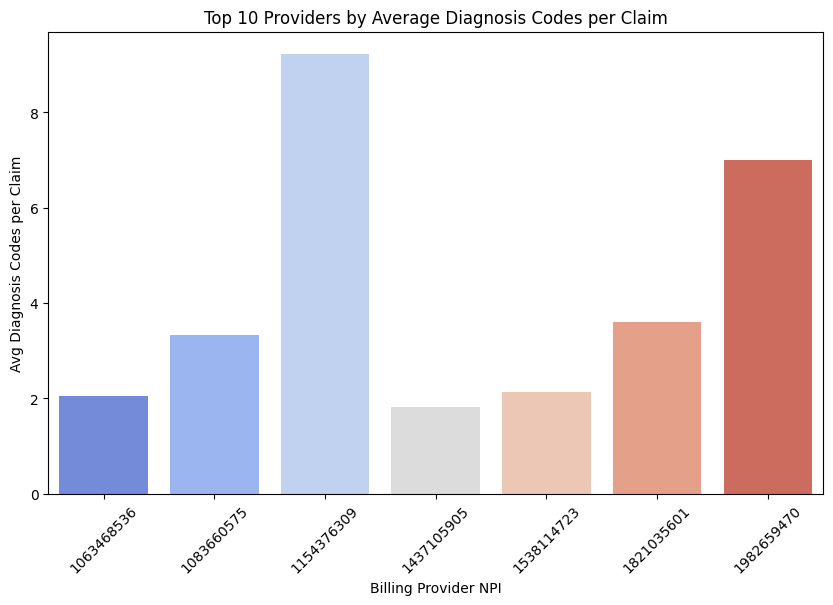

In [29]:
merged_hc = df_header.merge(df_code, on='ProspectiveClaimId', how='inner')
# Count diagnosis codes per claim
dx_counts = merged_hc.groupby('ProspectiveClaimId').agg(
    num_dx=('CodeValue', 'count'),
    billing_provider=('BillingProviderNPI', 'first')
).reset_index()

# Aggregate by provider: average number of diagnosis codes per claim
provider_complexity = dx_counts.groupby('billing_provider').agg(
    avg_dx_per_claim=('num_dx', 'mean'),
    total_claims=('ProspectiveClaimId', 'count')
).reset_index()

# Sort by avg_dx_per_claim
provider_complexity = provider_complexity.sort_values(by='avg_dx_per_claim', ascending=False).head(10)

# Bar chart for top 10 providers by complexity
plt.figure(figsize=(10,6))
sns.barplot(x='billing_provider', y='avg_dx_per_claim', data=provider_complexity, palette="coolwarm")
plt.title("Top 10 Providers by Average Diagnosis Codes per Claim")
plt.xlabel("Billing Provider NPI")
plt.ylabel("Avg Diagnosis Codes per Claim")
plt.xticks(rotation=45)
plt.show()

